In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from collections import Counter
from sklearn import datasets, metrics
from sklearn.datasets import fetch_openml
import joblib

In [12]:
from itables import show
import matplotlib.pyplot as plt

In [13]:
# Load the MNIST dataset
X, y = pd.read_csv('data_16.csv'), pd.read_csv('labels_16.csv')
X = X / np.max(X)
#suppress the first column
X = X.iloc[:, 1:]
y = y.iloc[:, 1:]
y = y.astype(int)


In [14]:
X.shape

(30000, 256)

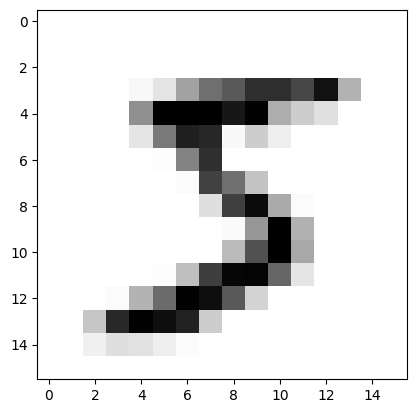

In [15]:
# Plot the digits: each image is 28x28 pixels
import cv2
image_test = np.array(X)[0].reshape(16, 16)
plt.imshow(image_test, cmap='binary')

In [16]:
digits = datasets.load_digits()
digits.data = digits.data/np.max(digits.data)
# Split data into 50% train and 50% test subsets
X_train, X_valid, y_train, y_valid = train_test_split(
    digits.data, digits.target, test_size=3/4, shuffle=False
)

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0, test_size=0.8)

In [18]:
from scipy.stats import uniform
from numpy.random import randint
# Define parameter grid# Define parameter distributions
precision = 100
param_dist = {
    'max_depth': [9, 11, 15],
    'min_child_weight': [3, 5],
    'subsample': randint(40, 100,precision)/precision,
    'n_estimators': [1000],
    'colsample_bytree': randint(40, 100, precision)/precision,
    'learning_rate': randint(10, 100, precision)/(precision*10)
}
# Create XGBClassifier
model = XGBClassifier(objective='multi:softprob', tree_method='approx', random_state=42, n_jobs=2)

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)
# Perform grid search
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=4, pre_dispatch=4, verbose=1)
random_search.fit(X_train, y_train, verbose=False)

# Print best score and parameters
print(f"Best score: {random_search.best_score_:.3f}") 
print(f"Best parameters: {random_search.best_params_}")

# Access best model
best_model = random_search.best_estimator_

# Save best model
best_model.save_model('best_model_minst.ubj')

# Load saved model
loaded_model = XGBClassifier()
loaded_model.load_model('best_model_minst.ubj')

# Use loaded model for predictions
predictions = loaded_model.predict(X_valid)

# Print accuracy score
accuracy = accuracy_score(y_valid, predictions)
print(f"Accuracy: {accuracy:.3f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

In [ ]:
print("Classification report for classifier %s:\n%s\n" % (best_model, metrics.classification_report(y_test, predictions)))

Classification report for classifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=np.float64(0.47), device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=np.float64(0.024),
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=2,
              num_parallel_tree=None, objective='multi:softprob', ...):
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       131
           1       0.91      0.77      0.83       137
  

In [ ]:
joblib.dump(best_model, 'xgb.pkl')

['xgb.pkl']